## Imports

In [1]:
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt      
import seaborn as sns                       

## Load the Data

In [2]:
# Load training data (transactions)
train_df = pd.read_csv('/Users/sakshiii/Desktop/credit_card_fraud_detection/data/train.csv')       

# Load customer data
customer_df = pd.read_csv('/Users/sakshiii/Desktop/credit_card_fraud_detection/data/customer.csv') 

# Load terminal (merchant) data
terminal_df = pd.read_csv('/Users/sakshiii/Desktop/credit_card_fraud_detection/data/terminal.csv') 


In [3]:
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0


In [4]:
customer_df.head()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8


In [5]:
terminal_df.head()

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,41.702200,72.032449
1,1,0.011437,30.233257
2,2,14.675589,9.233859
3,3,18.626021,34.556073
4,4,39.676747,53.881673


## Data Merge

In [6]:
train_df = pd.merge(train_df, customer_df, on='CUSTOMER_ID', how='left')  
train_df = pd.merge(train_df, terminal_df, on='TERMINAL_ID', how='left')  

In [7]:
train_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666


In [8]:
train_df.isnull().sum()

TRANSACTION_ID         0
TX_DATETIME            0
CUSTOMER_ID            0
TERMINAL_ID            0
TX_AMOUNT              0
TX_FRAUD               0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
x_terminal_id          0
y_terminal_id          0
dtype: int64

In [9]:
train_df.dtypes

TRANSACTION_ID           int64
TX_DATETIME             object
CUSTOMER_ID              int64
TERMINAL_ID              int64
TX_AMOUNT              float64
TX_FRAUD                 int64
x_customer_id          float64
y_customer_id          float64
mean_amount            float64
std_amount             float64
mean_nb_tx_per_day     float64
available_terminals     object
nb_terminals             int64
x_terminal_id          float64
y_terminal_id          float64
dtype: object

In [10]:
train_df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
count,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000
mean,204998.000000,496.256202,993.718526,53.182274,0.022601,50.184880,50.429252,51.710394,25.855197,2.650934,15.300318,50.218904,50.392889
std,84071.292461,285.274966,575.267551,39.573329,0.148627,28.732398,28.416998,27.475610,13.737805,0.961907,4.190001,28.682009,28.376333
min,59383.000000,0.000000,0.000000,0.000000,0.000000,0.007245,0.036734,5.063101,2.531550,0.018782,2.000000,0.011437,0.009695
25%,132190.500000,249.000000,496.000000,21.130000,0.000000,25.868407,27.459470,28.606102,14.303051,1.956902,12.000000,25.983398,27.692306
50%,204998.000000,498.000000,1000.000000,44.770000,0.000000,48.968491,49.236141,51.641807,25.820903,2.836935,15.000000,49.264044,49.074012
75%,277805.500000,741.000000,1483.000000,76.850000,0.000000,74.735746,75.945025,75.288972,37.644486,3.438147,18.000000,75.012425,75.563328
max,350613.000000,999.000000,1999.000000,291.150000,1.000000,99.994897,99.996402,99.981815,49.990907,3.999725,28.000000,99.859909,99.987579


### Exploratory Data Analysis

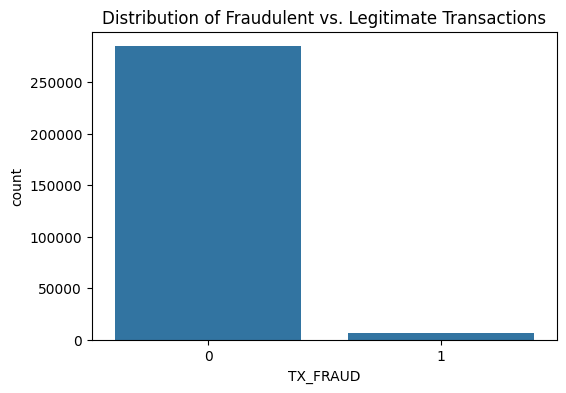

Percentage of fraudulent transactions: 2.2601%


In [11]:
# Check the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='TX_FRAUD', data=train_df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()

# Display the percentage of fraudulent transactions
fraud_percentage = train_df['TX_FRAUD'].mean() * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")

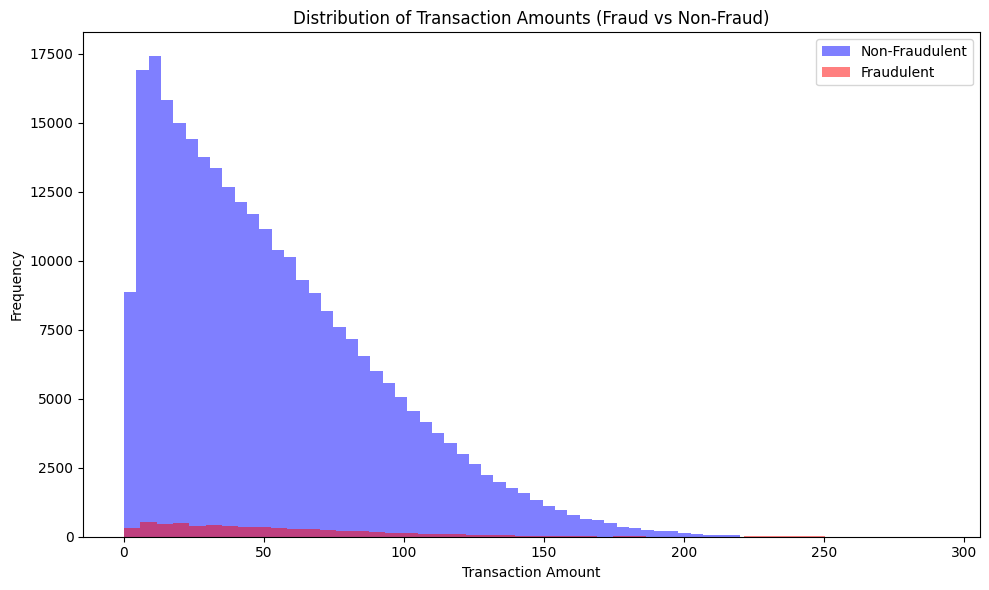

In [13]:
# Distribution of Transaction Amounts (Fraud vs Non-Fraud)
non_fraud_df = train_df[train_df['TX_FRAUD'] == 0]
fraud_df = train_df[train_df['TX_FRAUD'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(non_fraud_df['TX_AMOUNT'], bins=50, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.hist(fraud_df['TX_AMOUNT'], bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts (Fraud vs Non-Fraud)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_97486/1619771749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud_terminals.index, y=top_fraud_terminals['Fraud_Rate'], palette='Reds')


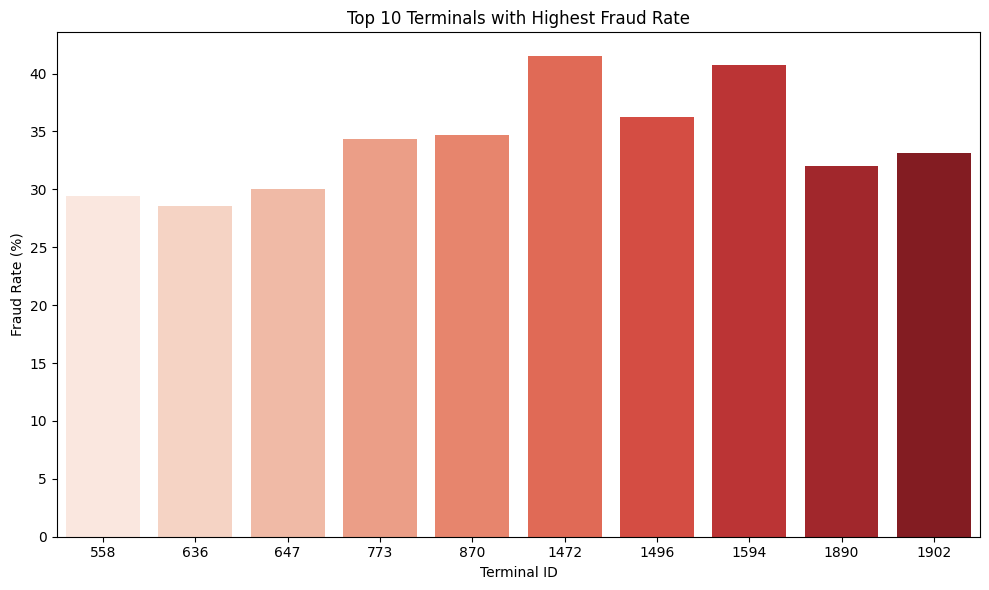

In [15]:
# Fraud Distribution by Terminal
fraud_by_terminal = train_df.groupby('TERMINAL_ID')['TX_FRAUD'].agg(['count', 'sum']).rename(columns={'count': 'Total_Transactions', 'sum': 'Fraudulent_Transactions'})
fraud_by_terminal['Fraud_Rate'] = (fraud_by_terminal['Fraudulent_Transactions'] / fraud_by_terminal['Total_Transactions']) * 100

top_fraud_terminals = fraud_by_terminal.sort_values(by='Fraud_Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_fraud_terminals.index, y=top_fraud_terminals['Fraud_Rate'], palette='Reds')
plt.xlabel('Terminal ID')
plt.ylabel('Fraud Rate (%)')
plt.title('Top 10 Terminals with Highest Fraud Rate')
plt.tight_layout()
plt.show()


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_97486/1534797766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud_customers.index, y=top_fraud_customers['Fraudulent_Transactions'], palette='Blues')


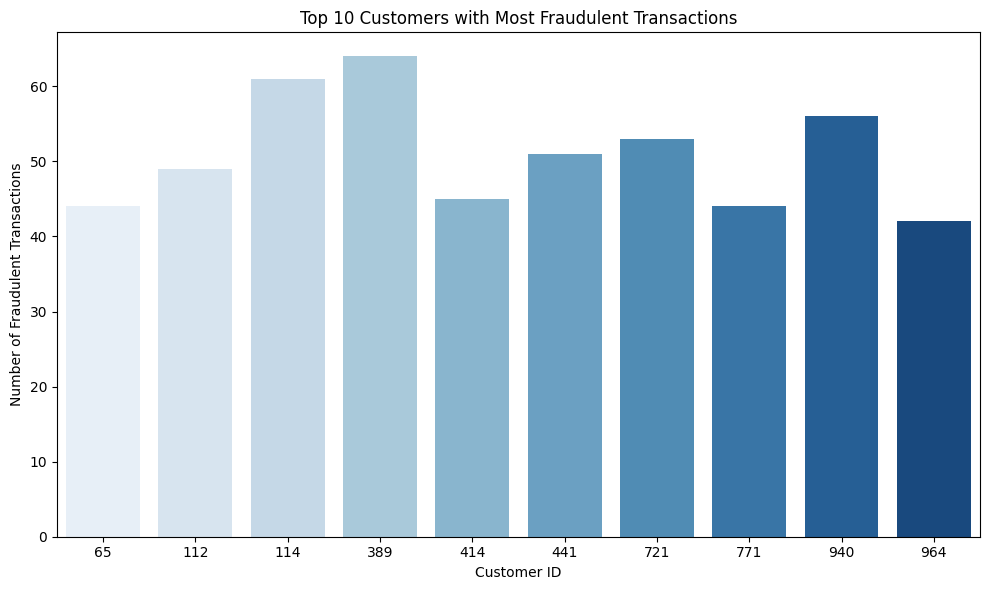

In [16]:
# Fraud Distribution by Customer
fraud_by_customer = train_df.groupby('CUSTOMER_ID')['TX_FRAUD'].agg(['count', 'sum']).rename(columns={'count': 'Total_Transactions', 'sum': 'Fraudulent_Transactions'})
fraud_by_customer['Fraud_Rate'] = (fraud_by_customer['Fraudulent_Transactions'] / fraud_by_customer['Total_Transactions']) * 100

top_fraud_customers = fraud_by_customer.sort_values(by='Fraudulent_Transactions', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_fraud_customers.index, y=top_fraud_customers['Fraudulent_Transactions'], palette='Blues')
plt.xlabel('Customer ID')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 10 Customers with Most Fraudulent Transactions')
plt.tight_layout()
plt.show()

<Axes: >

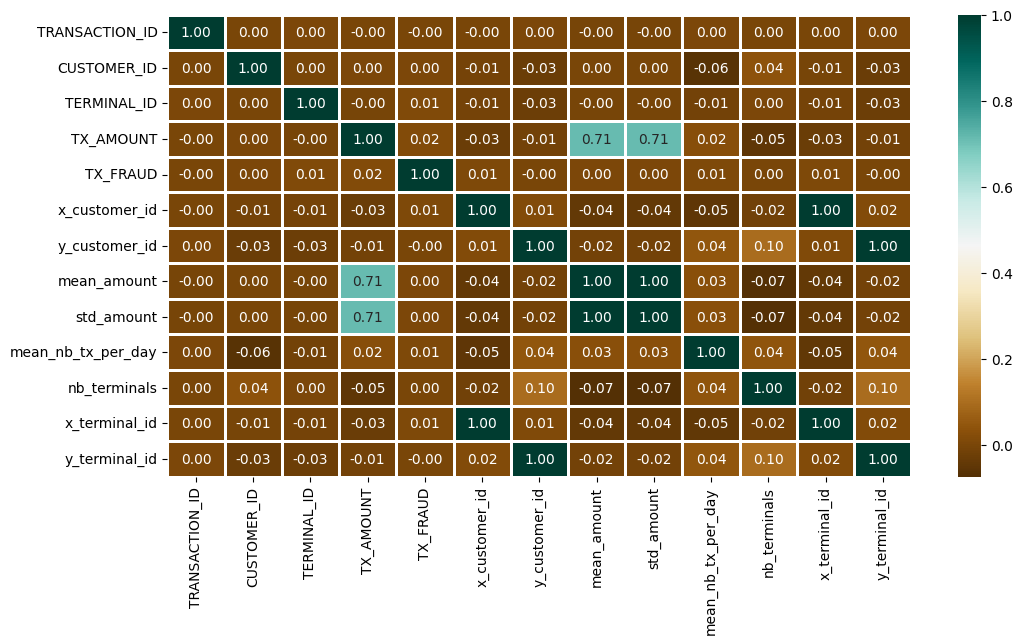

In [18]:
# Select only numerical features for correlation analysis
numerical_dataset = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


